<h2><center>_this is a lab notebook, results are preliminary and are not to be trusted._</center></h2>

In [10]:
import TraitData
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from permutation_analysis import Permutation
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame, Series

<img style="float:right" src="https://www.washington.edu/brand/files/2014/09/W-Logo_Purple_Hex.png" width=60px)/>
# Feature Importance Analysis for Random Forests 


## Data

In [5]:
responseVar = "migration_m"

drop_features = ["Taxon",
                 "migr_sterr_m", 
                 "shift + 2SE", 
                 'signif_shift',
                 "signif_shift2",
                 "dispmode01",
                 "DispModeEng", ## what is this
                 "shift + 2SE"
                ]

categorical_features = ["oceanity",
                        "dispersal_mode",
                        "BreedSysCode",
                        "Grime"]

td = TraitData.TraitData("../data/plants5.csv",
               responseVar,
               drop_features,
               categorical_features,
               dropNA=None)




__NEW (2/27):__ Adding imputation instead of just throwing away incomplete rows. 

In [24]:
from sklearn.preprocessing import Imputer
td.new_X = Imputer(missing_values='NaN', strategy='mean').fit_transform(td.X)

X, X_test, Y, Y_test = train_test_split(td.new_X, td.Y, test_size=0.30)

## Regression

In [25]:
rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(scale(X), Y)

importances_std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)

importances_ind = np.argsort(rfr.feature_importances_)[::-1]

print(td.feature_names[importances_ind])

Index(['Nbound_lat_GBIF_nosyn', 'earliest_seed_shed_mo', 'latest_seed_shed_mo',
       'Bio1_mean_nosyn', 'Bio1_var_nosyn', 'flwr_mo_end', 'Bio1_var_inclsyn',
       'Bio1_mean_inclsyn', 'Ave_seed_shed_ht_m', 'seed_shed_dur_mos',
       'Bio1_std_nosyn', 'flwr_dur_mos', 'Bio1_std_inclsyn',
       'diaspore_mass_mg', 'BreedSysCode_4.0', 'diaspore_ave_len_mm',
       'flwr_mo_start', 'nichebreadth_num_flor_zones', 'diaspore_max_len_mm',
       'diaspore_min_len_mm', 'SI01', 'ReprModeCode', 'seed_mass_mg',
       'Max_seed_shed_ht_m', 'Min_seed_shed_ht_m', 'BreedSysCode_2.0',
       'dispersal_mode_wind', 'StorageOrgan', 'MaxAlt',
       'nichebreadth_amplit_ocean', 'oceanity_os', 'Grime_csr', 'Grime_cs',
       'BreedSysCode_1.0', 'Grime_s', 'Resil', 'oceanity_ks',
       'dispersal_mode_gravity', 'BreedSysCode_3.0', 'dispersal_mode_animal',
       'GenTime', 'oceanity_o', 'oceanity_so', 'Grime_r', 'oceanity_sks',
       'oceanity_sos', 'Grime_sr', 'Grime_c', 'dispersal_mode_water'],
   

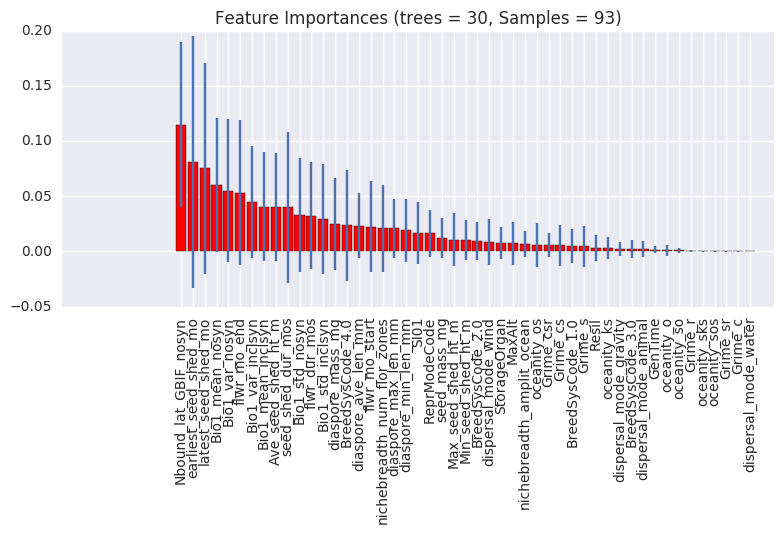

In [26]:
f, ax = plt.subplots()
bar_indices = np.arange(X.shape[1])
bar_width = 0.85

plt.title("Feature Importances (trees = {}, Samples = {})".format(rfr.get_params()["n_estimators"], len(X)))
plt.bar(bar_indices,
        rfr.feature_importances_[importances_ind],
        bar_width,
        color='r',
        yerr=importances_std[importances_ind],
        align='center', bottom=0)

plt.xticks(bar_indices, td.feature_names[importances_ind], rotation=90)
plt.tight_layout()
plt.show()

In [27]:
cross_val_score(rfr, scale(X), Y, cv=KFold(4), scoring="neg_mean_squared_error").mean()

-31.631392829106282